# Data Load

In [2]:
#gapminder dataset 라이브러리를 설치합니다.

!pip install gapminder

In [49]:
#gapminder를 import하고 출력합니다.

from gapminder import gapminder

gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


# Regression

**주어진 데이터를 활용하여 대륙명, 연도, 기대수명, 인구가 주어졌을 때 1인당 GDP를 예측하는 모델을 만드려고 한다.**

1. 주어진 빈칸에 알맞은 값을 입력하여 country 열을 뺀 새로운 데이터를 gapminder 변수에 할당 하시오.
아래와 같이 gapminder 데이터가 출력될 수 있게 하시오. (10점)

In [51]:
gapminder = gapminder.iloc[:, 1:]

In [52]:
gapminder

,continent,year,lifeExp,pop,gdpPercap
0,Asia,1952,28.801,8425333,779.445314
1,Asia,1957,30.332,9240934,820.853030
2,Asia,1962,31.997,10267083,853.100710
3,Asia,1967,34.020,11537966,836.197138
4,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...
1699,Africa,1987,62.351,9216418,706.157306
1700,Africa,1992,60.377,10704340,693.420786
1701,Africa,1997,46.809,11404948,792.449960
1702,Africa,2002,39.989,11926563,672.038623


2. 주어진 빈칸에 알맞은 값을 입력하여 continent 열을 one-hot encoding한 데이터를 encoded_data 변수에 할당하시오. 아래와 같이 encoded_data가 출력될 수 있게 하시오. (10점)

In [21]:
import pandas as pd

encoded_data = pd.get_dummies(gapminder, columns=['continent'])

In [22]:
encoded_data

,year,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,0,0,1,0,0
1,1957,30.332,9240934,820.853030,0,0,1,0,0
2,1962,31.997,10267083,853.100710,0,0,1,0,0
3,1967,34.020,11537966,836.197138,0,0,1,0,0
4,1972,36.088,13079460,739.981106,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,9216418,706.157306,1,0,0,0,0
1700,1992,60.377,10704340,693.420786,1,0,0,0,0
1701,1997,46.809,11404948,792.449960,1,0,0,0,0
1702,2002,39.989,11926563,672.038623,1,0,0,0,0


3. 알맞은 코드를 입력하여 아래와 같이 2x2 subplot에 year, lifeExp, pop, gdpPercap에 대한 히스토그램을 그려서 출력하시오. (20점)

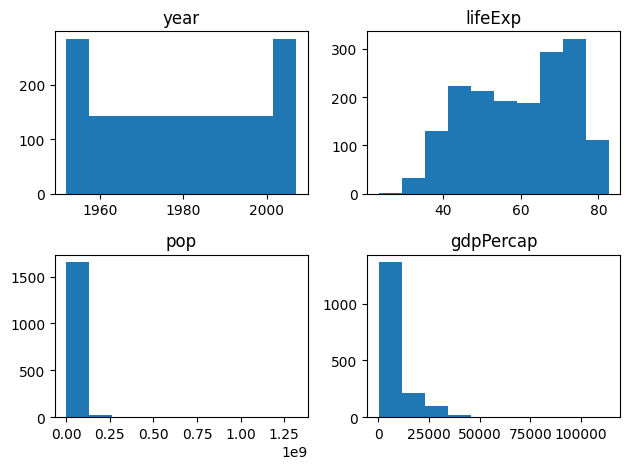

In [23]:
import matplotlib.pyplot as plt

###
plt.subplot(2, 2, 1)
plt.hist(encoded_data['year'])
plt.title('year')

plt.subplot(2, 2, 2)
plt.hist(encoded_data['lifeExp'])
plt.title('lifeExp')

plt.subplot(2, 2, 3)
plt.hist(encoded_data['pop'])
plt.title('pop')

plt.subplot(2, 2, 4)
plt.hist(encoded_data['gdpPercap'])
plt.title('gdpPercap')
###

plt.tight_layout()
plt.show()

4. pop과 gdpPercap 변수를 로그 변환을 하려 한다. 주어진 빈칸을 채워 넣어 알맞게 로그 변환 하시오. (10점)

In [24]:
import numpy as np

encoded_data['pop_log'] = np.log(encoded_data['pop'])
encoded_data['gdpPercap_log'] = np.log(encoded_data['gdpPercap'])

5. 주어진 빈칸을 알맞게 채워 넣어 pop_log, year, lifeExp, 원핫 인코딩된 대륙명 변수를 활용하여 gdpPercap_log를 예측하는 선형 회귀 모델을 만들고 MSE로 평가 하시오.이때, 다중 공선성 오류를 피하기 위해 원핫 인코딩된 변수는 continent_Oceania 변수를 제외하고 입력하시오. (20점)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 추출
X_df = encoded_data[['pop_log', 'year', 'lifeExp', 'continent_Africa', 'continent_Americas', 'continent_Asia', 'continent_Europe']]
y_df = encoded_data[['gdpPercap_log']]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# 모델 로드
lin_reg = LinearRegression()

# 모델 학습
lin_reg.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"{lin_reg.__class__.__name__} MSE: {mse}") #mse를 출력하는 코드

LinearRegression MSE: 0.4168393847396488


6. 주어진 빈칸을 알맞게 채워 넣어 pop_log, year, lifeExp, 원핫 인코딩된 대륙명 변수를 활용하여 gdpPercap_log를 예측하는 GradientBoosting, XGBoost, LightGBM 회귀 모델을 만들고 MSE로 평가 하시오.이때, 다중 공선성 오류를 피하기 위해 원핫 인코딩된 변수는 continent_Oceania 변수를 제외하고 입력하시오. (30점)

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델 정의
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 모델 학습
gb_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [gb_reg, xgb_reg, lgb_reg]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 1363, number of used features: 7
[LightGBM] [Info] Start training from score 8.155438
GradientBoostingRegressor MSE: 0.340591187501043
XGBRegressor MSE: 0.3846594314418784
LGBMRegressor MSE: 0.33232827916593727


# 보너스

1. 데이터 전처리 시간에 배운 것을 활용하여 데이터를 전처리하고, 전처리한 데이터를 가지고 LGBMRegressor()로 학습하시오. (시도 시 10점, 기존 모델에 비해 성능 향상 시 10점)

In [53]:
gapminder

,continent,year,lifeExp,pop,gdpPercap
0,Asia,1952,28.801,8425333,779.445314
1,Asia,1957,30.332,9240934,820.853030
2,Asia,1962,31.997,10267083,853.100710
3,Asia,1967,34.020,11537966,836.197138
4,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...
1699,Africa,1987,62.351,9216418,706.157306
1700,Africa,1992,60.377,10704340,693.420786
1701,Africa,1997,46.809,11404948,792.449960
1702,Africa,2002,39.989,11926563,672.038623


In [54]:
gapminder.info() ## 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   continent  1704 non-null   object 
 1   year       1704 non-null   int64  
 2   lifeExp    1704 non-null   float64
 3   pop        1704 non-null   int64  
 4   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 66.7+ KB


In [55]:
gapminder.duplicated().sum() ## 중복값 없음.

0

In [42]:
# 개수, 평균, 표준편차, 사분위수 조회
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


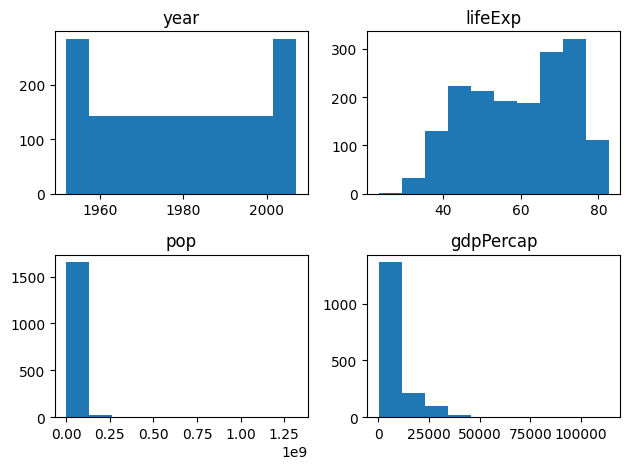

In [61]:
plt.subplot(2, 2, 1)
plt.hist(gapminder['year'])
plt.title('year')

plt.subplot(2, 2, 2)
plt.hist(gapminder['lifeExp'])
plt.title('lifeExp')

plt.subplot(2, 2, 3)
plt.hist(gapminder['pop'])
plt.title('pop')

plt.subplot(2, 2, 4)
plt.hist(gapminder['gdpPercap'])
plt.title('gdpPercap')

plt.tight_layout()
plt.show()

<Axes: >

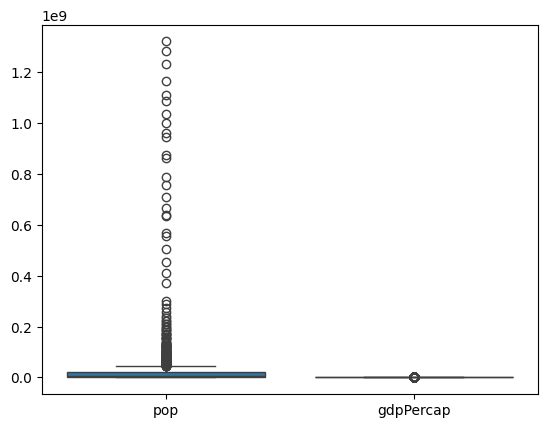

In [45]:
import seaborn as sns

## 이상치가 있을 것으로 예상되는 pop, gdpPercap의 boxplot 확인
sns.boxplot(data = gapminder.loc[:, ["pop", "gdpPercap"]])

In [60]:
gapminder1 = gapminder[gapminder["pop"] < 0.4*1e9]
gapminder1

,continent,year,lifeExp,pop,gdpPercap
0,Asia,1952,28.801,8425333,779.445314
1,Asia,1957,30.332,9240934,820.853030
2,Asia,1962,31.997,10267083,853.100710
3,Asia,1967,34.020,11537966,836.197138
4,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...
1699,Africa,1987,62.351,9216418,706.157306
1700,Africa,1992,60.377,10704340,693.420786
1701,Africa,1997,46.809,11404948,792.449960
1702,Africa,2002,39.989,11926563,672.038623


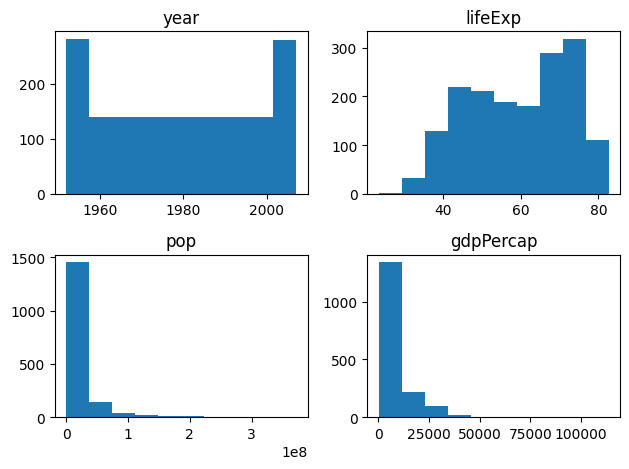

In [62]:
plt.subplot(2, 2, 1)
plt.hist(gapminder1['year'])
plt.title('year')

plt.subplot(2, 2, 2)
plt.hist(gapminder1['lifeExp'])
plt.title('lifeExp')

plt.subplot(2, 2, 3)
plt.hist(gapminder1['pop'])
plt.title('pop')

plt.subplot(2, 2, 4)
plt.hist(gapminder1['gdpPercap'])
plt.title('gdpPercap')

plt.tight_layout()
plt.show()

In [63]:
import numpy as np

gapminder1['pop_log'] = np.log(gapminder1['pop'])
gapminder1['gdpPercap_log'] = np.log(gapminder1['gdpPercap'])

<ipython-input-63-0a5fc6a74d44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gapminder1['pop_log'] = np.log(gapminder1['pop'])
<ipython-input-63-0a5fc6a74d44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gapminder1['gdpPercap_log'] = np.log(gapminder1['gdpPercap'])


In [64]:
gapminder1

,continent,year,lifeExp,pop,gdpPercap,pop_log,gdpPercap_log
0,Asia,1952,28.801,8425333,779.445314,15.946754,6.658583
1,Asia,1957,30.332,9240934,820.853030,16.039154,6.710344
2,Asia,1962,31.997,10267083,853.100710,16.144454,6.748878
3,Asia,1967,34.020,11537966,836.197138,16.261154,6.728864
4,Asia,1972,36.088,13079460,739.981106,16.386554,6.606625
...,...,...,...,...,...,...,...
1699,Africa,1987,62.351,9216418,706.157306,16.036497,6.559838
1700,Africa,1992,60.377,10704340,693.420786,16.186160,6.541637
1701,Africa,1997,46.809,11404948,792.449960,16.249558,6.675129
1702,Africa,2002,39.989,11926563,672.038623,16.294279,6.510316


In [65]:
import pandas as pd

encoded_data = pd.get_dummies(gapminder1, columns=['continent'])
encoded_data

,year,lifeExp,pop,gdpPercap,pop_log,gdpPercap_log,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,15.946754,6.658583,0,0,1,0,0
1,1957,30.332,9240934,820.853030,16.039154,6.710344,0,0,1,0,0
2,1962,31.997,10267083,853.100710,16.144454,6.748878,0,0,1,0,0
3,1967,34.020,11537966,836.197138,16.261154,6.728864,0,0,1,0,0
4,1972,36.088,13079460,739.981106,16.386554,6.606625,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,9216418,706.157306,16.036497,6.559838,1,0,0,0,0
1700,1992,60.377,10704340,693.420786,16.186160,6.541637,1,0,0,0,0
1701,1997,46.809,11404948,792.449960,16.249558,6.675129,1,0,0,0,0
1702,2002,39.989,11926563,672.038623,16.294279,6.510316,1,0,0,0,0


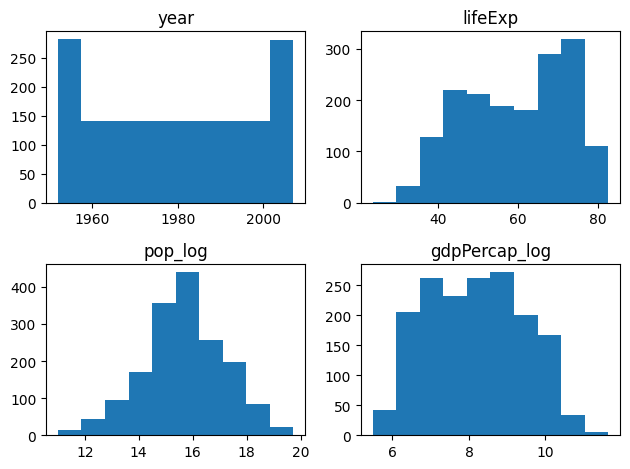

In [66]:
plt.subplot(2, 2, 1)
plt.hist(encoded_data['year'])
plt.title('year')

plt.subplot(2, 2, 2)
plt.hist(encoded_data['lifeExp'])
plt.title('lifeExp')

plt.subplot(2, 2, 3)
plt.hist(encoded_data['pop_log'])
plt.title('pop_log')

plt.subplot(2, 2, 4)
plt.hist(encoded_data['gdpPercap_log'])
plt.title('gdpPercap_log')

plt.tight_layout()
plt.show()

In [67]:
# 데이터 추출
X_df = encoded_data[['pop_log', 'year', 'lifeExp', 'continent_Africa', 'continent_Americas', 'continent_Asia', 'continent_Europe']]
y_df = encoded_data[['gdpPercap_log']]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# 모델 정의
lgb_reg = LGBMRegressor()

# 모델 학습
lgb_reg.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = lgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"{lgb_reg.__class__.__name__} MSE: {mse}") #mse를 출력하는 코드 -> 성능이 더 낮아짐

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 1344, number of used features: 7
[LightGBM] [Info] Start training from score 8.176251
LGBMRegressor MSE: 0.3367433266000356


2. 선형 회귀 모델을 이용하여 회귀분석을 진행하고, 그 의미에 대해서 직접 해석해보시오. (시도 시 10점)

In [84]:
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# 데이터 추출
X_df = encoded_data[['pop_log', 'year', 'lifeExp', 'continent_Africa', 'continent_Americas', 'continent_Asia', 'continent_Europe']]
y_df = encoded_data[['gdpPercap_log']]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# 모델 로드
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.1) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.
ridge_reg2 = Ridge(alpha=0.0001) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.
lasso_reg = Lasso(alpha=0.1) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.
lasso_reg2 = Lasso(alpha=0.00000001) #alpha는 계수에 대한 규제 정도를 나타냄. 값이 높을수록 규제 정도가 커짐.

# 모델 학습
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
ridge_reg2.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
lasso_reg2.fit(X_train, y_train)

# 예측 및 성능 평가
for model in [lin_reg, ridge_reg, ridge_reg2, lasso_reg, lasso_reg2]:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse}")

LinearRegression MSE: 0.440812857383087
Ridge MSE: 0.4408956070985477
Ridge MSE: 0.440812940190991
Lasso MSE: 0.4750851791305084
Lasso MSE: 0.4408128822691058


### 해석을 적는 란

해석 : 일반 선형 회귀에 대한 MSE는 Ridge, Lasso, alpha 값을 조절한 다른 선형 회귀 모델들의 MSE에 비해 낮았다. 따라서 위 모델 중에는 일반 선형 회귀 모델의 성능이 가장 양호하다.